# Task 1
Upload the file Online-Retail-France.xlsx.

It is a MS Excel file, you can read it with the Pandas function read_excel, show the size and a small portion of its content

In [38]:
import pandas as pd
import numpy as np

dataset_path = "Online-Retail-France.xlsx"
df = pd.read_excel(dataset_path)

In [3]:
print(f"the dataset has {df.shape[0]} rows and {df.shape[1]} columns")

il dataset ha 8557 righe e 7 colonne


In [4]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
4838,565854,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-09-07 13:22:00,1.95,12490.0
190,537897,22558,CLOTHES PEGS RETROSPOT PACK 24,12,2010-12-09 10:37:00,1.49,12683.0
1381,544355,21246,RED RETROSPOT BIG BOWL,6,2011-02-18 10:53:00,4.95,12714.0
2528,552826,21399,BLUE POLKADOT COFFEE MUG,6,2011-05-11 13:20:00,0.39,14277.0
6227,570672,22994,TRAVEL CARD WALLET RETROSPOT,24,2011-10-11 14:52:00,0.42,12536.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8557 entries, 0 to 8556
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    8557 non-null   object 
 1   StockCode    8557 non-null   object 
 2   Description  8557 non-null   object 
 3   Quantity     8557 non-null   int64  
 4   InvoiceDate  8557 non-null   object 
 5   UnitPrice    8557 non-null   float64
 6   CustomerID   8491 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 468.1+ KB


# Task 2

It is a transactional database where **the role of transaction identifier is played by the column `InvoiceNo` and the items are in the column `Description`**. 

Print the number of unique Description values 

In [13]:
df.nunique()

InvoiceNo       461
StockCode      1543
Description    1565
Quantity         77
InvoiceDate     461
UnitPrice        97
CustomerID       87
dtype: int64

In [12]:
unique_descriptions = df.nunique()["Description"]
print(f"the dataset has {unique_descriptions} unique descriptions (items)")

the dataset has 1565 unique descriptions (items)


# Task 3
Some descriptions represent the same item but have different leading or trailing spaces, therefore they must be made uniform with the Pandas function `str.strip()`

Print the number of unique Description values after this cleaning

In [23]:
df2 = df.copy()
df2["Description"] = df["Description"].str.strip()
unique_descriptions = df2.nunique()["Description"]
print(f"the dataset with cleaned descriptions has {unique_descriptions} unique descriptions (items)")

the dataset with cleaned descriptions has 1564 unique descriptions (items)


# Task 4

Some rows may not have an InvoiceNo and must be removed, because they cannot be used.
    
Check if there are such that rows and in case remove them. 

Inspect the effect of this cleaning

In [57]:
df3 = df2.copy()

null_mask = df3["CustomerID"].isna() # mi sa che voleva pulire i CustomerID 
# null_mask = df3["InvoiceNo"].isna()
null_presence = null_mask.max()
print(f"the dataset has {len(df3[null_mask])} rows with missing InvoiceNo")
display(df3[null_mask])

the dataset has 66 rows with missing InvoiceNo


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
3467,556924,82552,WASHROOM METAL SIGN,1,2011-06-15 14:14:00,1.45,NaN
3468,556924,21165,BEWARE OF THE CAT METAL SIGN,1,2011-06-15 14:14:00,1.69,NaN
3469,556924,47503A,ASS FLORAL PRINT MULTI SCREWDRIVER,1,2011-06-15 14:14:00,1.25,NaN
3470,556924,23154,SET OF 4 JAM JAR MAGNETS,3,2011-06-15 14:14:00,2.08,NaN
3471,556924,23156,SET OF 5 MINI GROCERY MAGNETS,3,2011-06-15 14:14:00,2.08,NaN
...,...,...,...,...,...,...,...
7244,575759,22617,BAKING SET SPACEBOY DESIGN,1,2011-11-11 10:50:00,4.95,NaN
7245,575759,84836,ZINC METAL HEART DECORATION,24,2011-11-11 10:50:00,1.25,NaN
7246,575759,21811,HANGING HEART WITH BELL,48,2011-11-11 10:50:00,0.39,NaN
7247,575759,21822,GLITTER CHRISTMAS TREE WITH BELLS,12,2011-11-11 10:50:00,0.79,NaN


In [58]:
if null_presence:
    df3 = df3.dropna(subset=["CustomerID"])
    print("rows with missing InvoiceNo after cleaning")
    display(df3[df3["CustomerID"].isna()])
else:
    print("no need for cleaning")

rows with missing InvoiceNo after cleaning


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8491 entries, 0 to 8556
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    8491 non-null   object 
 1   StockCode    8491 non-null   object 
 2   Description  8491 non-null   object 
 3   Quantity     8491 non-null   int64  
 4   InvoiceDate  8491 non-null   object 
 5   UnitPrice    8491 non-null   float64
 6   CustomerID   8491 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 530.7+ KB


# Task 5
Some InvoiceNo start with a C. They are "credit transactions" and must be removed.

Inspect the effect of this cleaning

In [70]:
df4 = df3.copy()
print(f"there are {len( df4[df4["InvoiceNo"].str.startswith("C")] )} transactions that start with 'C'")
df4[df4["InvoiceNo"].str.startswith("C")]

there are 149 transactions that start with 'C'


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
178,C537893,22450,SILK PURSE BABUSHKA BLUE,-1,2010-12-09 10:14:00,3.35,12721.0
179,C537893,22634,CHILDS BREAKFAST SET SPACEBOY,-2,2010-12-09 10:14:00,9.95,12721.0
180,C537893,22630,DOLLY GIRL LUNCH BOX,-2,2010-12-09 10:14:00,1.95,12721.0
354,C539104,22662,LUNCH BAG DOLLY GIRL DESIGN,-3,2010-12-16 10:38:00,1.65,12494.0
356,C539114,22667,RECIPE BOX RETROSPOT,-3,2010-12-16 11:24:00,2.95,12494.0
...,...,...,...,...,...,...,...
8323,C580263,21934,SKULL SHOULDER BAG,-10,2011-12-02 12:43:00,1.65,12536.0
8324,C580263,21872,GLAMOROUS MUG,-12,2011-12-02 12:43:00,1.06,12536.0
8539,C581316,23020,GLASS SONGBIRD STORAGE JAR,-1,2011-12-08 11:46:00,12.50,12523.0
8540,C581316,21531,RED RETROSPOT SUGAR JAM BOWL,-1,2011-12-08 11:46:00,2.55,12523.0


In [73]:
df4 = df4.drop( df4[df4["InvoiceNo"].str.startswith("C")].index )

In [74]:
print(f"after cleaning there are {len( df4[df4["InvoiceNo"].str.startswith("C")] )} transactions that start with 'C'")
df4[df4["InvoiceNo"].str.startswith("C")]

after cleaning there are 0 transactions that start with 'C'


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


# Task 6
Several transactions include the item POSTAGE, which represents the mailing expenses.

In this analysis we are not interested in it, therefore the rows with POSTAGE will be removed.

Inspect the effect of this cleaning.

In [77]:
df5 = df4.copy()
print(f"there are {len( df5[df5["Description"].str.contains("POSTAGE")] )} transactions that contain the item POSTAGE")
df5[df5["Description"].str.contains("POSTAGE")]

there are 300 transactions that contain the item POSTAGE


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
19,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0
26,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.0,12686.0
42,536974,POST,POSTAGE,2,2010-12-03 13:59:00,18.0,12682.0
105,537065,POST,POSTAGE,9,2010-12-05 11:57:00,18.0,12567.0
146,537463,POST,POSTAGE,4,2010-12-07 10:08:00,18.0,12681.0
...,...,...,...,...,...,...,...
8476,580756,POST,POSTAGE,1,2011-12-06 10:19:00,18.0,12723.0
8496,580986,POST,POSTAGE,4,2011-12-06 16:34:00,18.0,12650.0
8508,581001,POST,POSTAGE,3,2011-12-07 08:07:00,18.0,12583.0
8534,581171,POST,POSTAGE,2,2011-12-07 15:02:00,18.0,12615.0


In [78]:
df5 = df5.drop( df5[df5["Description"].str.contains("POSTAGE")].index )

In [80]:
print(f"after cleaning there are {len( df5[df5["Description"].str.contains("POSTAGE")] )} transactions that contain the item POSTAGE")
df5[df5["Description"].str.contains("POSTAGE")]

after cleaning there are 0 transactions that contain the item POSTAGE


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID


# Task 7

After the cleanup, we need to consolidate the items into one transaction per row with products one–hot–encoded.

To do so:
- group by InvoiceNo and Description computing a sum on Quantity
- use the Pandas unstack function to move the items from rows to columns,
- reset the index,
- fill the missing with zero,
- store the result in a new dataframe called basket and inspect it.

In [89]:
df5.groupby(["InvoiceNo", "Description"])["Quantity"].sum()

InvoiceNo  Description                    
536370     ALARM CLOCK BAKELIKE GREEN         12
           ALARM CLOCK BAKELIKE PINK          24
           ALARM CLOCK BAKELIKE RED           24
           CHARLOTTE BAG DOLLY GIRL DESIGN    20
           CIRCUS PARADE LUNCH BOX            24
                                              ..
581587     CIRCUS PARADE LUNCH BOX            12
           PACK OF 20 SPACEBOY NAPKINS        12
           PLASTERS IN TIN CIRCUS PARADE      12
           PLASTERS IN TIN STRONGMAN          12
           SPACEBOY LUNCH BOX                 12
Name: Quantity, Length: 8006, dtype: int64

In [95]:
df5.groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().fillna(0).sample(10)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
571240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0
568040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566115,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
574093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
basket = df5.groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().fillna(0)
basket.sample(10)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
544817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
545180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
577502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
basket.describe()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,...,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,0.875000,0.312500,0.005208,0.062500,0.513021,0.388021,0.403646,0.062500,0.283854,0.187500,...,0.065104,0.195312,0.023438,0.010417,0.083333,0.281250,0.013021,0.062500,0.031250,0.062500
std,5.128633,2.483628,0.102062,0.864894,5.466235,2.989619,3.468032,1.224745,2.014348,1.490177,...,1.275776,2.203932,0.341969,0.204124,1.632993,2.358046,0.255155,0.864894,0.612372,0.864894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,48.000000,20.000000,2.000000,12.000000,96.000000,24.000000,48.000000,24.000000,24.000000,12.000000,...,25.000000,25.000000,6.000000,4.000000,32.000000,36.000000,5.000000,12.000000,12.000000,12.000000


# Task 8

There are a lot of zeros in the data but we also need to convert to `True` the positive values and to `False` the non–positive values.

Inspect the result of this transformation and verify the correctness

In [134]:
basket2 = basket.copy().astype("bool") # questo mi serve per non generare dei warning sotto
basket2[basket2 > 0] = True
basket2[basket2 <= 0] = False
basket2.sample(10)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
553044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
554134,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
555937,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
551539,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
547892,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
575049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
545051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
547520,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
557489,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [135]:
basket2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 536370 to 581587
Columns: 1542 entries, 10 COLOUR SPACEBOY PEN to ZINC T-LIGHT HOLDER STARS SMALL
dtypes: bool(1542)
memory usage: 581.2+ KB


# Task 9

Find the maximum value of min_support such that the number of rules generated from the frequent itemsets with lift not less than 1 is at least 20.

Show the value obtained for min_support and show the rules.

Hint: use a loop with an initial value min_support=1 and decrease it in steps -0.01

In [143]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

rules = None
for min_support in np.arange(1, 0, -0.01):
    itemset = apriori(basket2, min_support=min_support, use_colnames=True)
    if len(itemset) < 1:
        continue
    
    rules = association_rules(itemset, metric="lift", min_threshold=1)
    if len(rules) >= 20:
        break

print(f"with threshold min_support={min_support:.2f} i obtained {len(rules)} rules with lift > 1")
rules = rules[["antecedents", "consequents", "support", "confidence", "lift"]]
display(rules)

with threshold min_support=0.08 i obtained 20 rules with lift > 1


,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.080729,0.837838,8.466572
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.080729,0.815789,8.466572
2,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.091146,0.660377,3.842196
3,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.091146,0.530303,3.842196
4,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.104167,0.597015,3.473541
5,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.104167,0.606061,3.473541
6,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN SPACEBOY),0.106771,0.611940,4.433681
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.106771,0.773585,4.433681
8,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.104167,0.769231,5.470085
9,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.104167,0.740741,5.470085


# Task 10

In order to scatter–plot some information about the rules, it is better to sort them according to some metrics.
    
We will sort on descending lift and confidence, then do a scatter plot of them

In [149]:
sorted_rules = rules.sort_values(["lift", "confidence"], ascending=False)
sorted_rules

,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.080729,0.837838,8.466572
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.080729,0.815789,8.466572
15,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.101562,0.975000,7.488000
18,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",0.101562,0.780000,7.488000
14,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.101562,0.975000,6.933333
19,(SET/6 RED SPOTTY PAPER CUPS),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",0.101562,0.722222,6.933333
12,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.125000,0.960000,6.826667
13,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.125000,0.888889,6.826667
16,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.101562,0.812500,6.000000
17,(SET/20 RED RETROSPOT PAPER NAPKINS),"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",0.101562,0.750000,6.000000


<Axes: xlabel='lift', ylabel='confidence'>

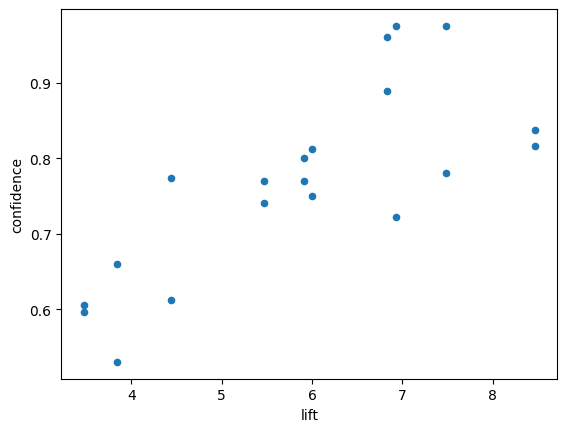

In [150]:
sorted_rules.plot(x="lift", y="confidence", kind="scatter")